# COMP 472 - Assignment 1

## Import Librarys

In [1]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, classification_report
from sklearn.neural_network import MLPClassifier

## Load The CSVs to DFs

In [2]:
penguindf = pd.read_csv('penguins.csv')
abalonedf = pd.read_csv('abalone.csv')
output_array = []
display(penguindf)
display(abalonedf)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
331,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,F,0.605,0.470,0.165,1.1775,0.6110,0.2275,0.2920,9
1,M,0.550,0.425,0.150,0.8315,0.4110,0.1765,0.2165,10
2,M,0.460,0.345,0.110,0.4595,0.2350,0.0885,0.1160,7
3,F,0.650,0.475,0.165,1.3875,0.5800,0.3485,0.3095,9
4,M,0.575,0.470,0.140,0.8375,0.3485,0.1735,0.2400,11
...,...,...,...,...,...,...,...,...,...
4172,F,0.570,0.450,0.150,0.9645,0.5310,0.1890,0.2090,9
4173,F,0.645,0.535,0.190,1.2395,0.4680,0.2385,0.4240,10
4174,M,0.695,0.550,0.195,1.6645,0.7270,0.3600,0.4450,11
4175,F,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000,11


## 1 Hot Vector Penguins DF

In [3]:
penguin_columns_to_encode = ['island','sex']
penguindf_encoded = pd.get_dummies(penguindf, columns=penguin_columns_to_encode, drop_first=True, dtype='float')
display(penguindf_encoded)


,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,Adelie,39.1,18.7,181,3750,0.0,1.0,1.0
1,Adelie,39.5,17.4,186,3800,0.0,1.0,0.0
2,Adelie,40.3,18.0,195,3250,0.0,1.0,0.0
3,Adelie,36.7,19.3,193,3450,0.0,1.0,0.0
4,Adelie,39.3,20.6,190,3650,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214,4925,0.0,0.0,0.0
329,Gentoo,46.8,14.3,215,4850,0.0,0.0,0.0
330,Gentoo,50.4,15.7,222,5750,0.0,0.0,1.0
331,Gentoo,45.2,14.8,212,5200,0.0,0.0,0.0


## Plot Points on pie chart to check distribution


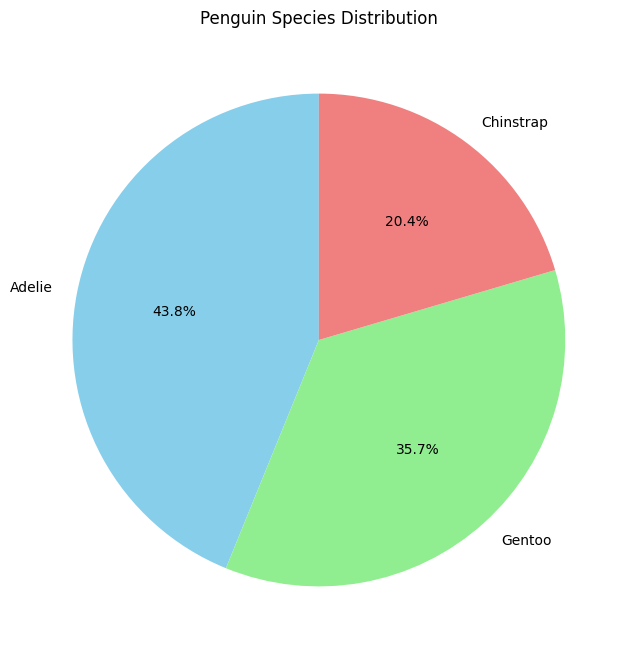

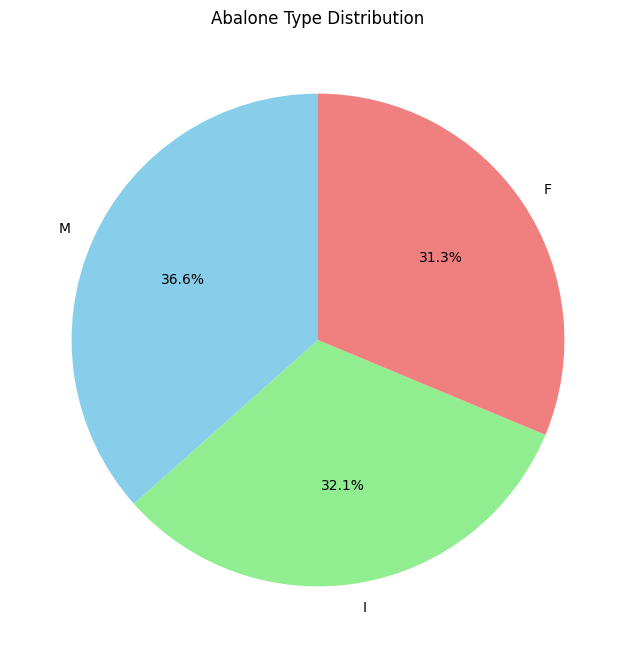

In [4]:
penguin_species_count = penguindf['species'].value_counts() # count the number of each species
abalone_type_count = abalonedf['Type'].value_counts() # count the number of each type


plt.figure(figsize=(8, 8))
plt.pie(penguin_species_count, labels=penguin_species_count.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Penguin Species Distribution')
plt.figure(figsize=(8, 8))
plt.pie(abalone_type_count, labels=abalone_type_count.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Abalone Type Distribution')
plt.show()

## Split data for training

In [5]:
X_penguin = penguindf_encoded.drop('species', axis=1)
y_penguin = penguindf_encoded['species']
penguin_training_set = sklearn.model_selection.train_test_split(X_penguin,y_penguin)
X_penguin_train, X_penguin_test, y_penguin_train, y_penguin_test = penguin_training_set

X_abalone = abalonedf.drop('Type', axis=1)
y_abalone = abalonedf['Type']
abalone_training_set = sklearn.model_selection.train_test_split(X_abalone,y_abalone)
X_abalone_train, X_abalone_test, y_abalone_train, y_abalone_test = abalone_training_set

## Base-DT

Penguin F1 Score:  0.9761904761904762
Abalone Accuracy:  0.5004784688995215


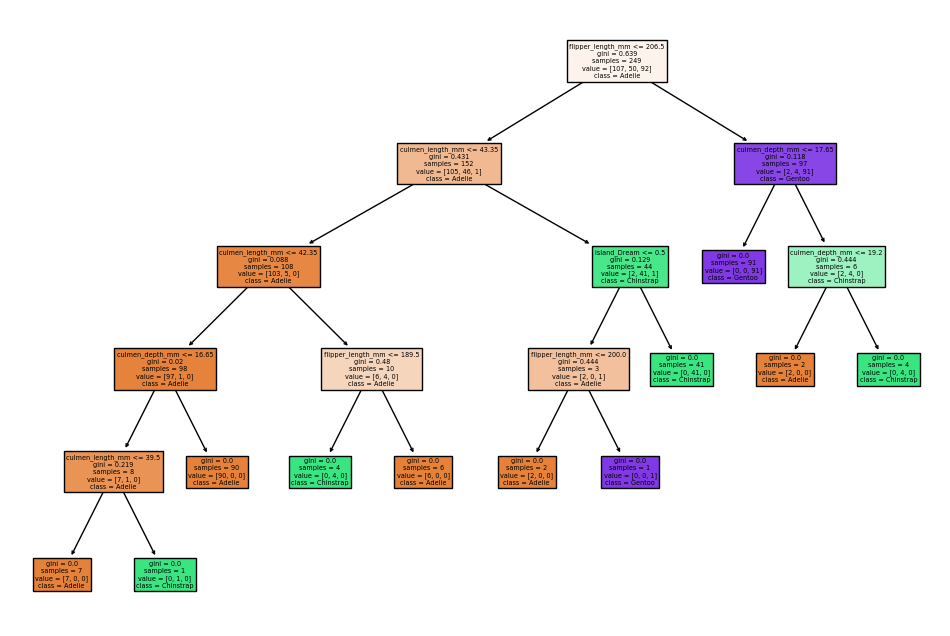

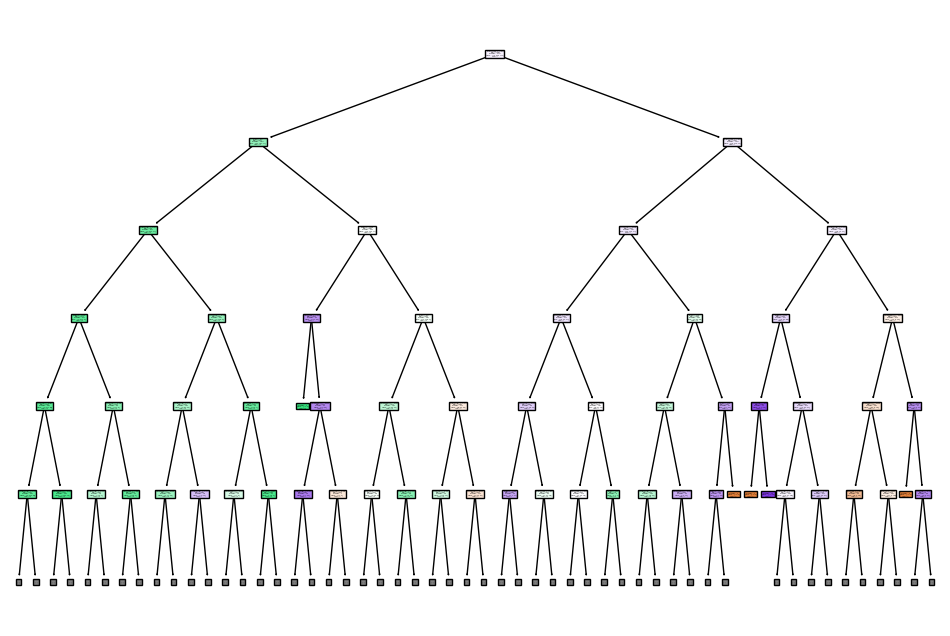

In [6]:
classifier_penguin_bdt = DecisionTreeClassifier()
x_penguin_train_bdt = X_penguin_train.copy()
y_penguin_train_bdt = y_penguin_train.copy()
x_penguin_test_bdt = X_penguin_test.copy()
y_penguin_test_bdt = y_penguin_test.copy()

classifier_penguin_bdt.fit(x_penguin_train_bdt, y_penguin_train_bdt)
y_penguin_pred_bdt = classifier_penguin_bdt.predict(x_penguin_test_bdt)
penguin_f1_bdt = f1_score(y_penguin_test_bdt, y_penguin_pred_bdt, average='weighted')
print("Penguin F1 Score: ", penguin_f1_bdt)
plt.figure(figsize=(12, 8))
plot_tree(classifier_penguin_bdt, filled=True, feature_names=X_penguin.columns, class_names=y_penguin.unique())

classifier_abalone_bdt = DecisionTreeClassifier()
x_abalone_train_bdt = X_abalone_train.copy()
y_abalone_train_bdt = y_abalone_train.copy()
x_abalone_test_bdt = X_abalone_test.copy()
y_abalone_test_bdt = y_abalone_test.copy()

classifier_abalone_bdt.fit(x_abalone_train_bdt, y_abalone_train_bdt)
y_abalone_pred_bdt = classifier_abalone_bdt.predict(x_abalone_test_bdt)
abalone_accuracy_bdt = accuracy_score(y_abalone_test_bdt, y_abalone_pred_bdt)
print("Abalone Accuracy: ", abalone_accuracy_bdt)
plt.figure(figsize=(12, 8))
plot_tree(classifier_abalone_bdt, filled=True, feature_names=X_abalone.columns, class_names=y_abalone.unique(), max_depth=5)
plt.show()

## Top-DT

Best Parameters Penguin:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4}
Confusion Matrix Penguin:  [[39  0  0]
 [ 0 18  0]
 [ 0  0 27]]
Penguin F1 Score Weighted:  1.0
Penguin F1 Score Macro:  1.0
Penguin Accuracy:  1.0
Penguin Precision:  1.0
Penguin Recall:  1.0


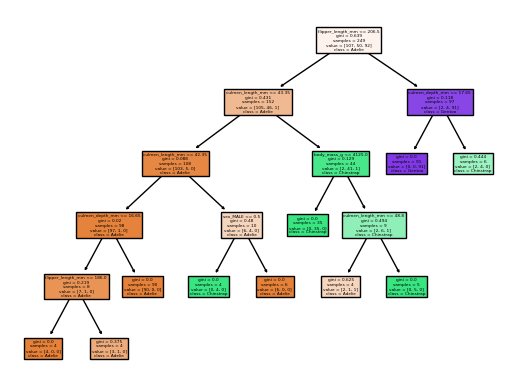

Best Parameters Abalone:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6}


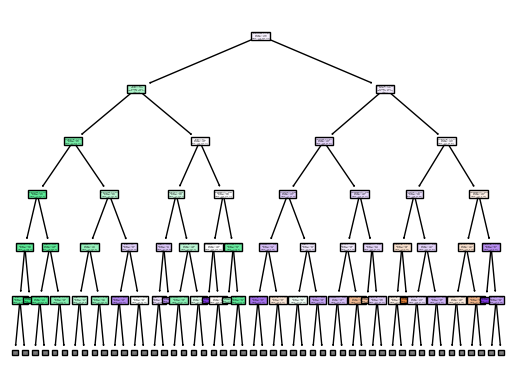

In [7]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2 , 6 , None],
    'min_samples_leaf': [ 4 , 3,  6 ]
}
grid_search_penguin_tdt = GridSearchCV(DecisionTreeClassifier(), param_grid)
x_penguin_train_tdt = X_penguin_train.copy()
y_penguin_train_tdt = y_penguin_train.copy()
x_penguin_test_tdt = X_penguin_test.copy()
y_penguin_test_tdt = y_penguin_test.copy()


grid_search_penguin_tdt.fit(x_penguin_train_tdt, y_penguin_train_tdt)
print("Best Parameters Penguin: ", grid_search_penguin_tdt.best_params_)
y_penguin_pred_tdt = grid_search_penguin_tdt.predict(x_penguin_test_tdt)
confusion_matrix_penguin = confusion_matrix(y_penguin_test_tdt, y_penguin_pred_tdt)
print("Confusion Matrix Penguin: ", confusion_matrix_penguin)
penguin_f1 = f1_score(y_penguin_test_tdt, y_penguin_pred_tdt, average='weighted')
print("Penguin F1 Score Weighted: ", penguin_f1)
penguin_f1 = f1_score(y_penguin_test_tdt, y_penguin_pred_tdt, average='macro')
print("Penguin F1 Score Macro: ", penguin_f1)
penguin_accuracy = accuracy_score(y_penguin_test_tdt, y_penguin_pred_tdt)
print("Penguin Accuracy: ", penguin_accuracy)
penguin_precision = precision_score(y_penguin_test_tdt, y_penguin_pred_tdt, average='weighted')
print("Penguin Precision: ", penguin_precision)
penguin_recall = recall_score(y_penguin_test_tdt, y_penguin_pred_tdt, average='weighted')
print("Penguin Recall: ", penguin_recall)

plot_tree(grid_search_penguin_tdt.best_estimator_, filled=True, feature_names=X_penguin.columns, class_names=y_penguin.unique())
plt.show()

grid_search_abalone_tbt = GridSearchCV(DecisionTreeClassifier(), param_grid)
x_abalone_train_tdt = X_abalone_train.copy()
y_abalone_train_tdt = y_abalone_train.copy()
x_abalone_test_tdt = X_abalone_test.copy()
y_abalone_test_tdt = y_abalone_test.copy()

grid_search_abalone_tbt.fit(x_abalone_train_tdt, y_abalone_train_tdt)
print("Best Parameters Abalone: ", grid_search_abalone_tbt.best_params_)
y_abalone_pred_tdt = grid_search_abalone_tbt.predict(x_abalone_test_tdt)
plot_tree(grid_search_abalone_tbt.best_estimator_, filled=True, feature_names=X_abalone.columns, class_names=y_abalone.unique(), max_depth=5)
plt.show()

## Base-MLP

In [8]:
neural_network_penguin_bmlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation="logistic", solver="sgd")
x_penguin_train_bmlp = X_penguin_train.copy()
y_penguin_train_bmlp = y_penguin_train.copy()
x_penguin_test_bmlp = X_penguin_test.copy()
y_penguin_test_bmlp = y_penguin_test.copy()

neural_network_penguin_bmlp.fit(x_penguin_train_bmlp, y_penguin_train_bmlp)
y_penguin_pred_bmlp = neural_network_penguin_bmlp.predict(x_penguin_test_bmlp)
penguin_f1_blmp = f1_score(y_penguin_test_bmlp, y_penguin_pred_bmlp, average='weighted')
print("Penguin F1 Score: ", penguin_f1_blmp)

neural_network_abalone_mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation="logistic", solver="sgd")
x_abalone_train_bmlp = X_abalone_train.copy()
y_abalone_train_bmlp = y_abalone_train.copy()
x_abalone_test_bmlp = X_abalone_test.copy()
y_abalone_test_bmlp = y_abalone_test.copy()

neural_network_abalone_mlp.fit(x_abalone_train_bmlp, y_abalone_train_bmlp)
y_abalone_pred_bmlp = neural_network_abalone_mlp.predict(x_abalone_test_bmlp)
abalone_accuracy_blmp = accuracy_score(y_abalone_test_bmlp, y_abalone_pred_bmlp)
print("Abalone Accuracy: ", abalone_accuracy_blmp)


Penguin F1 Score:  0.2944250871080139
Abalone Accuracy:  0.522488038277512


c:\Users\Alan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Top-MLP

In [9]:
param_grid = {
    'activation': ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['sgd', 'adam']
}
grid_search_penguin_tmlp = GridSearchCV(MLPClassifier(), param_grid)
x_penguin_train_tmlp = X_penguin_train.copy()
y_penguin_train_tmlp = y_penguin_train.copy()
x_penguin_test_tmlp = X_penguin_test.copy()
y_penguin_test_tmlp = y_penguin_test.copy()

y_penguin_pred_tmlp = neural_network_penguin_bmlp.predict(x_penguin_test_bmlp)
grid_search_penguin_tmlp.fit(x_penguin_train_tmlp, y_penguin_train_tmlp)
print("Best Parameters Penguin: ", grid_search_penguin_tmlp.best_params_)
y_penguin_pred_tmlp = grid_search_penguin_tdt.predict(x_penguin_test_tmlp)

grid_search_abalone_tmlp =  GridSearchCV(MLPClassifier(), param_grid)
x_abalone_train_tmlp = X_abalone_train.copy()
y_abalone_train_tmlp = y_abalone_train.copy()
x_abalone_test_tmlp = X_abalone_test.copy()
y_abalone_test_tmlp = y_abalone_test.copy()

grid_search_abalone_tmlp.fit(x_abalone_train_tmlp, y_abalone_train_tmlp)
print("Best Parameters Abalone: ", grid_search_abalone_tmlp.best_params_)
y_abalone_pred_tmlp = grid_search_abalone_tbt.predict(x_abalone_test_tmlp)

c:\Users\Alan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Alan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Alan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Alan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

Best Parameters Penguin:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


c:\Users\Alan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Alan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Alan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Alan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

Best Parameters Abalone:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


## Penguin Performance

### Base-DT

           precision    recall  f1-score
Adelie      0.974359  0.974359  0.974359
Chinstrap   0.944444  0.944444  0.944444
Gentoo      1.000000  1.000000  1.000000

Accuracy: 0.9761904761904762
Macro-Average F1 Score: 0.9729344729344729
Weighted-Average F1 Score: 0.9761904761904762


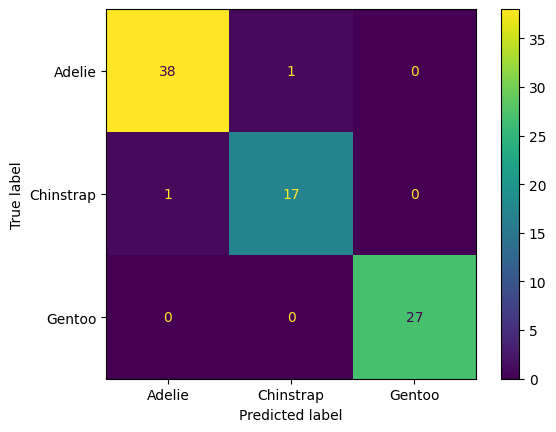

In [10]:
# (B) Confusion Matrix
confusion_matrix_penguin_bdt = confusion_matrix(y_penguin_test_bdt, y_penguin_pred_bdt)
display_cm = ConfusionMatrixDisplay(confusion_matrix_penguin_bdt, display_labels=classifier_penguin_bdt.classes_)
display_cm.plot()

# (C) Precision, Recall, F1 Score
report = classification_report(y_penguin_test_bdt, y_penguin_pred_bdt, digits=10, output_dict=True)
print(pd.DataFrame(report).drop(columns=['macro avg', 'weighted avg', 'accuracy']).transpose().drop(columns=['support']))
print()

# (D) Accuracy, Macro-Average F1 Score, Weighted-Average F1 Score
# accuracy_penguin_bdt = accuracy_score(y_penguin_test_bdt, y_penguin_pred_bdt)
# macro_avg_f1_penguin_bdt = f1_score(y_penguin_test_bdt, y_penguin_pred_bdt, average='macro')
# weighted_avg_f1_penguin_bdt = f1_score(y_penguin_test_bdt, y_penguin_pred_bdt, average='weighted')
# print(f"Accuracy: {accuracy_penguin_bdt}\nMacro-Average F1 Score: {macro_avg_f1_penguin_bdt}\nWeighted-Average F1 Score: {weighted_avg_f1_penguin_bdt}")

df = pd.DataFrame(report).transpose()
accuracy_penguin_bdt = df.at['accuracy', 'precision']
macro_avg_f1_penguin_bdt = df.at['macro avg', 'f1-score']
weighted_avg_f1_penguin_bdt = df.at['weighted avg', 'f1-score']
print(f"Accuracy: {accuracy_penguin_bdt}\nMacro-Average F1 Score: {macro_avg_f1_penguin_bdt}\nWeighted-Average F1 Score: {weighted_avg_f1_penguin_bdt}")

### Top DT

           precision  recall  f1-score
Adelie           1.0     1.0       1.0
Chinstrap        1.0     1.0       1.0
Gentoo           1.0     1.0       1.0

Accuracy: 1.0
Macro-Average F1 Score: 1.0
Weighted-Average F1 Score: 1.0
Best Parameters Penguin:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4}


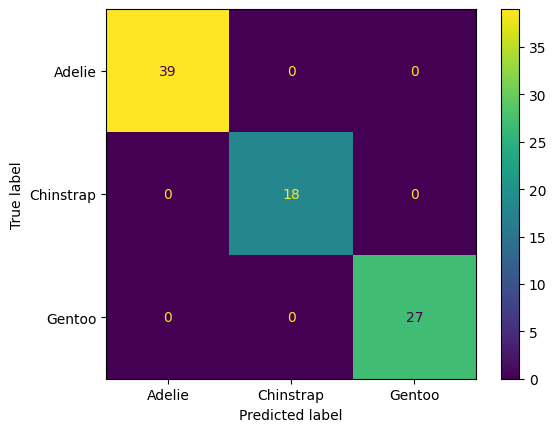

In [11]:
# (B) Confusion Matrix
confusion_matrix_penguin_tdt = confusion_matrix(y_penguin_test_tdt, y_penguin_pred_tdt)
display_cm = ConfusionMatrixDisplay(confusion_matrix_penguin_tdt, display_labels=grid_search_penguin_tdt.classes_)
display_cm.plot()

# (C) Precision, Recall, F1 Score
report = classification_report(y_penguin_test_tdt, y_penguin_pred_tdt, digits=10, output_dict=True)
print(pd.DataFrame(report).drop(columns=['macro avg', 'weighted avg', 'accuracy']).transpose().drop(columns=['support']))
print()

# (D) Accuracy, Macro-Average F1 Score, Weighted-Average F1 Score
# accuracy_penguin_bdt = accuracy_score(y_penguin_test_bdt, y_penguin_pred_bdt)
# macro_avg_f1_penguin_bdt = f1_score(y_penguin_test_bdt, y_penguin_pred_bdt, average='macro')
# weighted_avg_f1_penguin_bdt = f1_score(y_penguin_test_bdt, y_penguin_pred_bdt, average='weighted')
# print(f"Accuracy: {accuracy_penguin_bdt}\nMacro-Average F1 Score: {macro_avg_f1_penguin_bdt}\nWeighted-Average F1 Score: {weighted_avg_f1_penguin_bdt}")

df = pd.DataFrame(report).transpose()
accuracy_penguin_tdt = df.at['accuracy', 'precision']
macro_avg_f1_penguin_tdt = df.at['macro avg', 'f1-score']
weighted_avg_f1_penguin_tdt = df.at['weighted avg', 'f1-score']
print(f"Accuracy: {accuracy_penguin_tdt}\nMacro-Average F1 Score: {macro_avg_f1_penguin_tdt}\nWeighted-Average F1 Score: {weighted_avg_f1_penguin_tdt}")
print("Best Parameters Penguin: ", grid_search_penguin_tdt.best_params_)

### Base-MLP

c:\Users\Alan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

           precision  recall  f1-score
Adelie      0.464286     1.0  0.634146
Chinstrap   0.000000     0.0  0.000000
Gentoo      0.000000     0.0  0.000000

Accuracy: 0.4642857142857143
Macro-Average F1 Score: 0.21138211382113822
Weighted-Average F1 Score: 0.2944250871080139


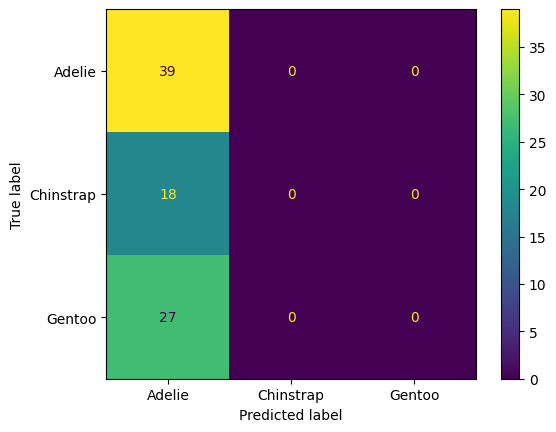

In [12]:
# (B) Confusion Matrix
confusion_matrix_penguin_bmlp = confusion_matrix(y_penguin_test_bmlp, y_penguin_pred_bmlp)
display_cm = ConfusionMatrixDisplay(confusion_matrix_penguin_bmlp, display_labels=neural_network_penguin_bmlp.classes_)
display_cm.plot()

# (C) Precision, Recall, F1 Score
report = classification_report(y_penguin_test_bmlp, y_penguin_pred_bmlp, digits=10, output_dict=True)
print(pd.DataFrame(report).drop(columns=['macro avg', 'weighted avg', 'accuracy']).transpose().drop(columns=['support']))
print()

# (D) Accuracy, Macro-Average F1 Score, Weighted-Average F1 Score
# accuracy_penguin_bdt = accuracy_score(y_penguin_test_bdt, y_penguin_pred_bdt)
# macro_avg_f1_penguin_bdt = f1_score(y_penguin_test_bdt, y_penguin_pred_bdt, average='macro')
# weighted_avg_f1_penguin_bdt = f1_score(y_penguin_test_bdt, y_penguin_pred_bdt, average='weighted')
# print(f"Accuracy: {accuracy_penguin_bdt}\nMacro-Average F1 Score: {macro_avg_f1_penguin_bdt}\nWeighted-Average F1 Score: {weighted_avg_f1_penguin_bdt}")

df = pd.DataFrame(report).transpose()
accuracy_penguin_bmlp = df.at['accuracy', 'precision']
macro_avg_f1_penguin_bmlp = df.at['macro avg', 'f1-score']
weighted_avg_f1_penguin_bmlp = df.at['weighted avg', 'f1-score']
print(f"Accuracy: {accuracy_penguin_bmlp}\nMacro-Average F1 Score: {macro_avg_f1_penguin_bmlp}\nWeighted-Average F1 Score: {weighted_avg_f1_penguin_bmlp}")

### Top-MLP

           precision  recall  f1-score
Adelie           1.0     1.0       1.0
Chinstrap        1.0     1.0       1.0
Gentoo           1.0     1.0       1.0

Accuracy: 1.0
Macro-Average F1 Score: 1.0
Weighted-Average F1 Score: 1.0
Best Parameters Penguin:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


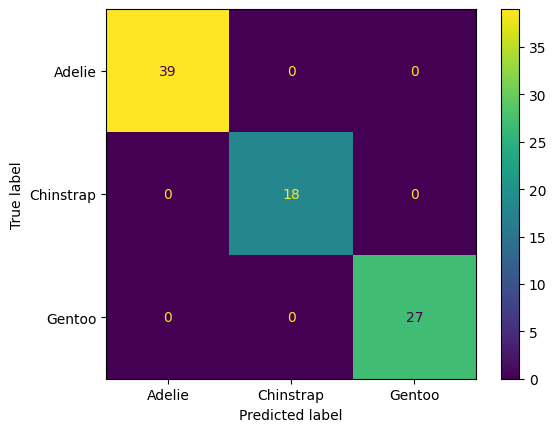

In [13]:
# (B) Confusion Matrix
confusion_matrix_penguin_tmlp = confusion_matrix(y_penguin_test_tmlp, y_penguin_pred_tmlp)
display_cm = ConfusionMatrixDisplay(confusion_matrix_penguin_tmlp, display_labels=grid_search_penguin_tmlp.classes_)
display_cm.plot()

# (C) Precision, Recall, F1 Score
report = classification_report(y_penguin_test_tmlp, y_penguin_pred_tmlp, digits=10, output_dict=True)
print(pd.DataFrame(report).drop(columns=['macro avg', 'weighted avg', 'accuracy']).transpose().drop(columns=['support']))
print()

# (D) Accuracy, Macro-Average F1 Score, Weighted-Average F1 Score
# accuracy_penguin_bdt = accuracy_score(y_penguin_test_bdt, y_penguin_pred_bdt)
# macro_avg_f1_penguin_bdt = f1_score(y_penguin_test_bdt, y_penguin_pred_bdt, average='macro')
# weighted_avg_f1_penguin_bdt = f1_score(y_penguin_test_bdt, y_penguin_pred_bdt, average='weighted')
# print(f"Accuracy: {accuracy_penguin_bdt}\nMacro-Average F1 Score: {macro_avg_f1_penguin_bdt}\nWeighted-Average F1 Score: {weighted_avg_f1_penguin_bdt}")

df = pd.DataFrame(report).transpose()
accuracy_penguin_tmlp = df.at['accuracy', 'precision']
macro_avg_f1_penguin_tmlp = df.at['macro avg', 'f1-score']
weighted_avg_f1_penguin_tmlp = df.at['weighted avg', 'f1-score']
print(f"Accuracy: {accuracy_penguin_tmlp}\nMacro-Average F1 Score: {macro_avg_f1_penguin_tmlp}\nWeighted-Average F1 Score: {weighted_avg_f1_penguin_tmlp}")
print("Best Parameters Penguin: ", grid_search_penguin_tmlp.best_params_)

## Abalone Performance

   precision    recall  f1-score
F   0.404834  0.408537  0.406677
I   0.646377  0.644509  0.645441
M   0.449864  0.447439  0.448649

Accuracy: 0.5004784688995215
Macro-Average F1 Score: 0.5002556069813613
Weighted-Average F1 Score: 0.5006328748026673


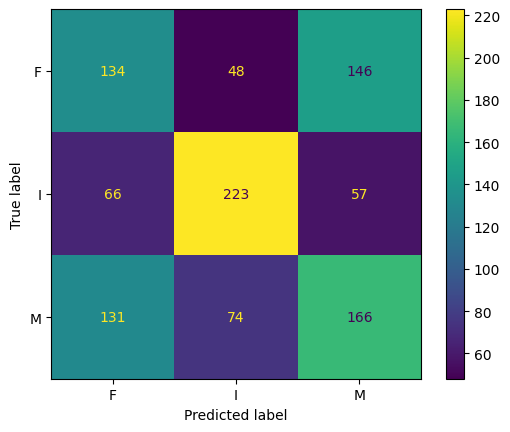

In [14]:
# (B) Confusion Matrix
confusion_matrix_abalone_bdt = confusion_matrix(y_abalone_test_bdt, y_abalone_pred_bdt)
display_cm = ConfusionMatrixDisplay(confusion_matrix_abalone_bdt, display_labels=classifier_abalone_bdt.classes_)
display_cm.plot()

# (C) Precision, Recall, F1 Score
report = classification_report(y_abalone_test_bdt, y_abalone_pred_bdt, digits=10, output_dict=True)
print(pd.DataFrame(report).drop(columns=['macro avg', 'weighted avg', 'accuracy']).transpose().drop(columns=['support']))
print()

# (D) Accuracy, Macro-Average F1 Score, Weighted-Average F1 Score
# accuracy_penguin_bdt = accuracy_score(y_penguin_test_bdt, y_penguin_pred_bdt)
# macro_avg_f1_penguin_bdt = f1_score(y_penguin_test_bdt, y_penguin_pred_bdt, average='macro')
# weighted_avg_f1_penguin_bdt = f1_score(y_penguin_test_bdt, y_penguin_pred_bdt, average='weighted')
# print(f"Accuracy: {accuracy_penguin_bdt}\nMacro-Average F1 Score: {macro_avg_f1_penguin_bdt}\nWeighted-Average F1 Score: {weighted_avg_f1_penguin_bdt}")

df = pd.DataFrame(report).transpose()
accuracy_abalone_bdt = df.at['accuracy', 'precision']
macro_avg_f1_abalone_bdt = df.at['macro avg', 'f1-score']
weighted_avg_f1_abalone_bdt = df.at['weighted avg', 'f1-score']
print(f"Accuracy: {accuracy_abalone_bdt}\nMacro-Average F1 Score: {macro_avg_f1_abalone_bdt}\nWeighted-Average F1 Score: {weighted_avg_f1_abalone_bdt}")